<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Import-clean-data" data-toc-modified-id="Import-clean-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import clean data</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Data-distribution-and-outliers-(numerical)" data-toc-modified-id="Data-distribution-and-outliers-(numerical)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data distribution and outliers (numerical)</a></span><ul class="toc-item"><li><span><a href="#3.1.-Normal-distribution" data-toc-modified-id="3.1.-Normal-distribution-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>3.1. Normal distribution</a></span></li><li><span><a href="#3.2.-Dealing-with-outliers" data-toc-modified-id="3.2.-Dealing-with-outliers-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>3.2. Dealing with outliers</a></span></li></ul></li><li><span><a href="#3.3-Data-distribution-(categorical)" data-toc-modified-id="3.3-Data-distribution-(categorical)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>3.3 Data distribution (categorical)</a></span></li><li><span><a href="#Data-correlation" data-toc-modified-id="Data-correlation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Data correlation</a></span><ul class="toc-item"><li><span><a href="#Numerical-variables" data-toc-modified-id="Numerical-variables-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Numerical variables</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Categorical variables</a></span></li></ul></li></ul></li></ul></div>

## Import libraries

In [397]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import plotly.express as px
from scipy.stats import chi2_contingency
import helper as func
from sklearn.preprocessing import OrdinalEncoder

## Import clean data

In [374]:
data = pd.read_csv('data_clean_v1.csv')

In [375]:
data.shape

(14571, 19)

In [376]:
data.head()

,Unnamed: 0,age,gender,country,education,role,experience_prog,programming_lang_c,experience_ml,industry,company_size,team_size,salary,country_group,company_size_g,team_size_g,role_group,salary_avg,salary_group
0,1,50-54,Man,India,Bachelor’s degree,Other,5-10 years,2,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,25000-29999,India,Medium,Small,Other,27500.0,between 10k and 30k
1,2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,4,Under 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,60000-69999,Other,Large,Small,Data Analyst,65000.0,between 50k and 80k
2,3,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,3,No experience,Academics/Education,"1000-9,999 employees",0,0-999,Other,Large,No team,Data Engineer,500.0,less than 10k
3,4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,1,5-10 years,Academics/Education,"1000-9,999 employees",0,30000-39999,Other,Large,No team,Data Scientist,35000.0,between 30k and 50k
4,5,45-49,Man,India,Doctoral degree,Other,< 1 years,3,10-20 years,Academics/Education,50-249 employees,5-9,30000-39999,India,Medium,Small,Other,35000.0,between 30k and 50k


In [377]:
data = data.drop(['Unnamed: 0'], axis=1)

In [378]:
data.dtypes

age                    object
gender                 object
country                object
education              object
role                   object
experience_prog        object
programming_lang_c      int64
experience_ml          object
industry               object
company_size           object
team_size              object
salary                 object
country_group          object
company_size_g         object
team_size_g            object
role_group             object
salary_avg            float64
salary_group           object
dtype: object

I will create a dataframe only countries fom Europe, USA and one for India.

In [379]:
data = data[data['country_group'] == 'Europe']

In [380]:
data = data.drop(['country_group','company_size', 'team_size','salary', 'role', 'salary_group'], axis=1)

In [381]:
data.shape

(2932, 12)

## Feature Engineering

### Data distribution and outliers (numerical)

Checking distribution and outliers

In [382]:
def dist_boxplot_num(data, skip_columns=[]):
    for col in data.select_dtypes(np.number):
        if col not in skip_columns:
            fig, axes = plt.subplots(1, 2, figsize=(15, 5))
            sns.distplot(data[col], ax=axes[0])
            sns.boxplot(data[col], ax=axes[1])
            plt.show()

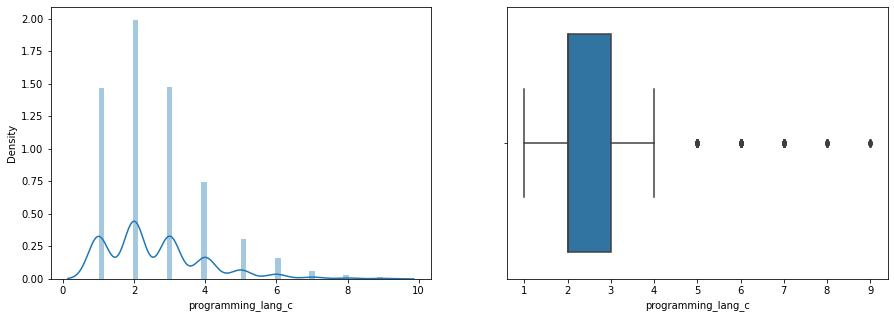

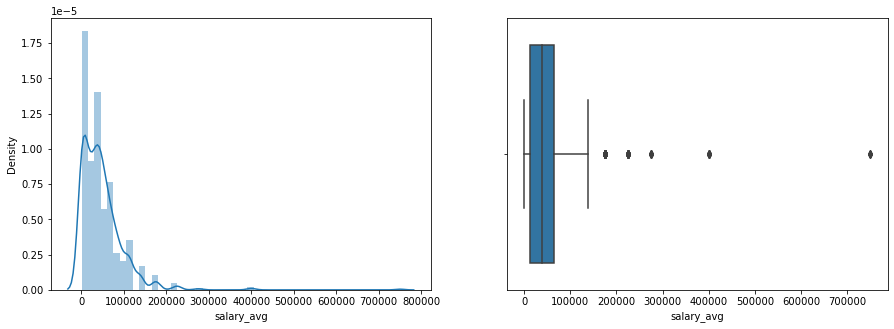

In [383]:
dist_boxplot_num(data)

#### 3.1. Normal distribution

I want to apply boxcox tranformation to columns salary_average, as it is the one with bigger numbers

In [384]:
data, _ci = func.boxcox_transform(data, skip_columns = ['programming_lang_c'])
data

,age,gender,country,education,experience_prog,programming_lang_c,experience_ml,industry,company_size_g,team_size_g,role_group,salary_avg
10,35-39,Man,Greece,Doctoral degree,10-20 years,4,4-5 years,Academics/Education,Medium,Small,Data Scientist,12500.0
11,50-54,Man,Belgium,Bachelor’s degree,20+ years,2,1-2 years,Energy/Mining,Large,Small,Data Analyst,2500.0
16,25-29,Woman,Poland,Master’s degree,3-5 years,2,Under 1 year,Computers/Technology,Small,Small,Data Engineer,27500.0
25,25-29,Man,Italy,Master’s degree,1-3 years,2,Under 1 year,Energy/Mining,Small,Small,Other,35000.0
36,35-39,Woman,Russia,I prefer not to answer,1-3 years,2,No experience,Academics/Education,Large,Small,Data Scientist,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14542,30-34,Man,Portugal,Master’s degree,10-20 years,4,5-10 years,Manufacturing/Fabrication,Large,Large,Data Engineer,75000.0
14544,25-29,Man,Germany,Master’s degree,1-3 years,2,1-2 years,Computers/Technology,Large,Large,Data Scientist,65000.0
14554,40-44,Man,Russia,I prefer not to answer,< 1 years,2,Under 1 year,Computers/Technology,Large,Large,Data Engineer,500.0
14561,35-39,Man,Russia,Bachelor’s degree,3-5 years,4,No experience,Insurance/Risk Assessment,Large,Medium,Data Engineer,22500.0


#### 3.2. Dealing with outliers

I will remove the outliers from columns salary_avg and programming_lang_c, as we can some outliers in the boxplots

In [385]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [386]:
data = remove_outliers(data, threshold=1.5)

In [387]:
data.shape

(2589, 12)

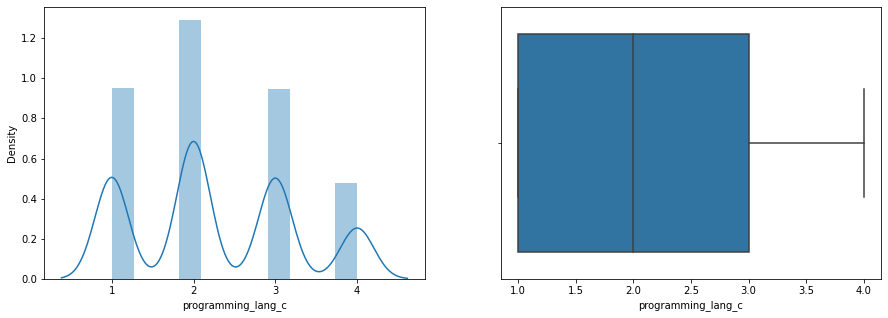

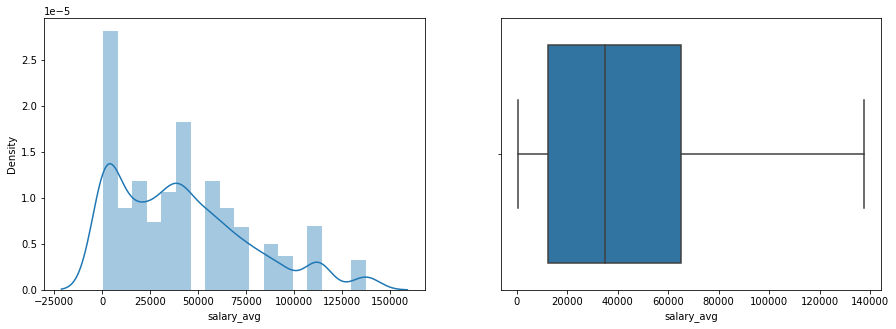

In [388]:
dist_boxplot_num(data)

### 3.3 Data distribution (categorical)

In [361]:
def dist_cat(df):
    for col in df.select_dtypes(np.object):
        order = df[col].value_counts(ascending=True).index
        fig, axes = plt.subplots(1, figsize=(22, 12))
        sns.countplot(y=df[col], data=df, order=order)
        plt.show()

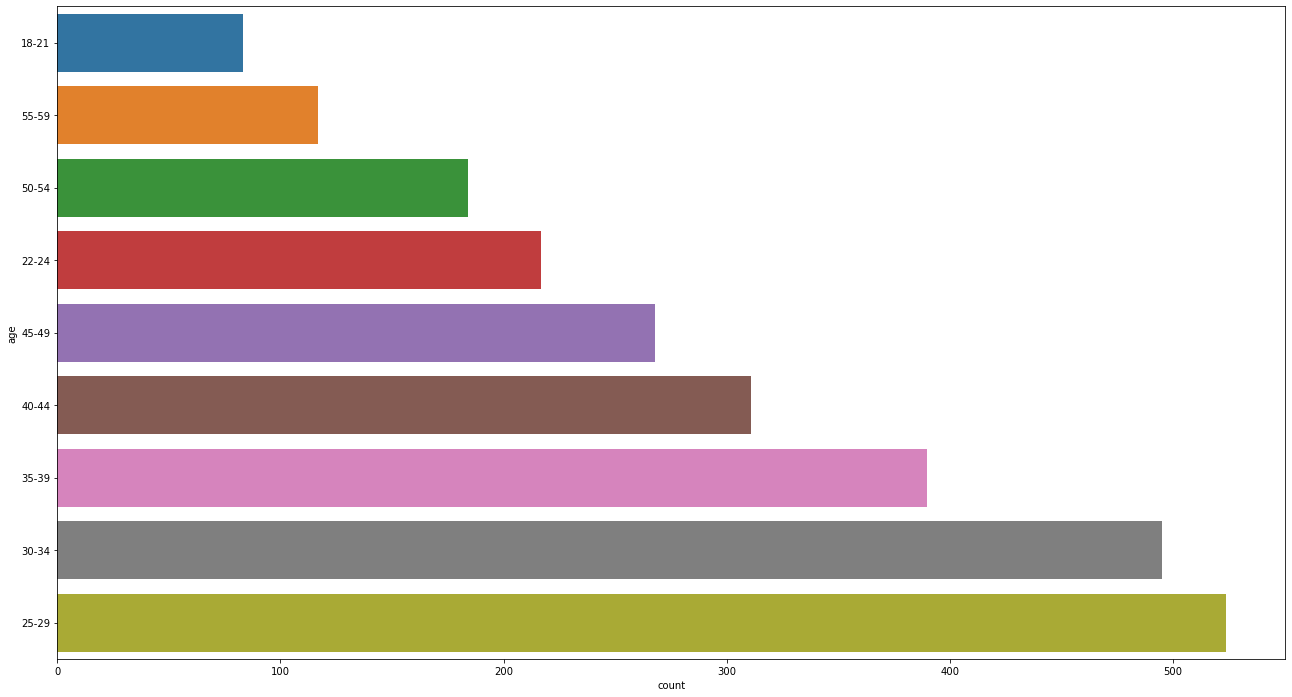

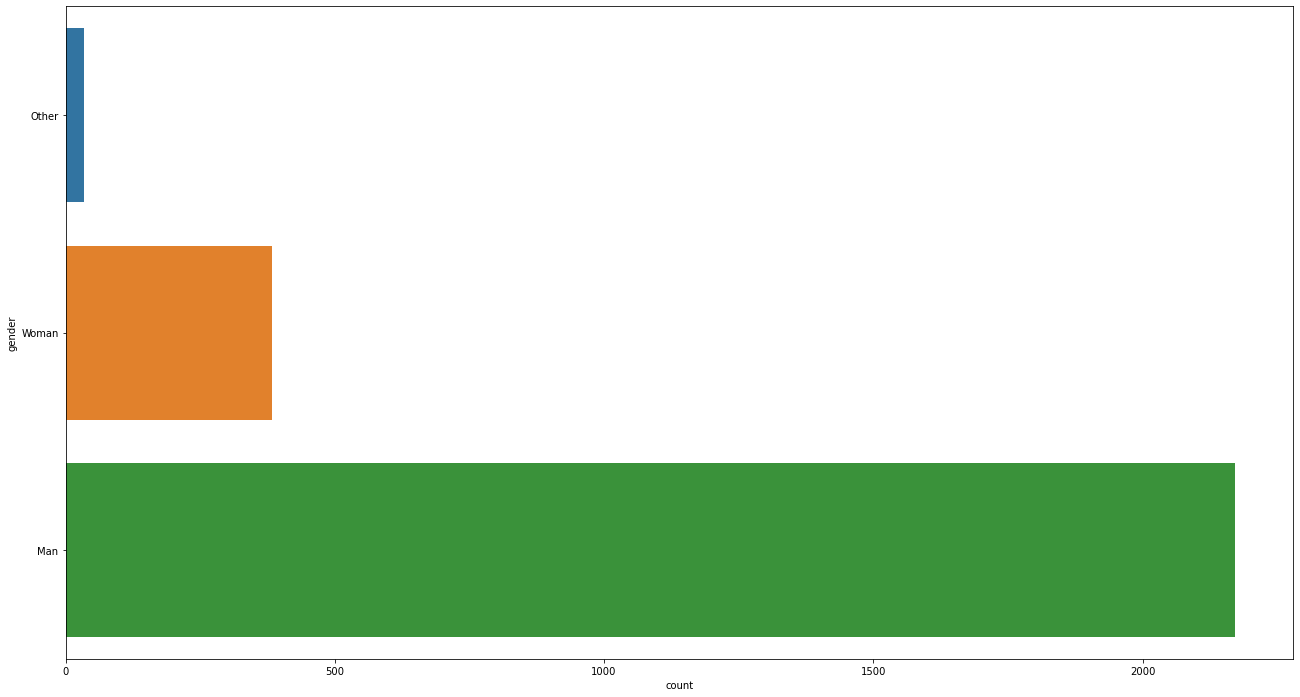

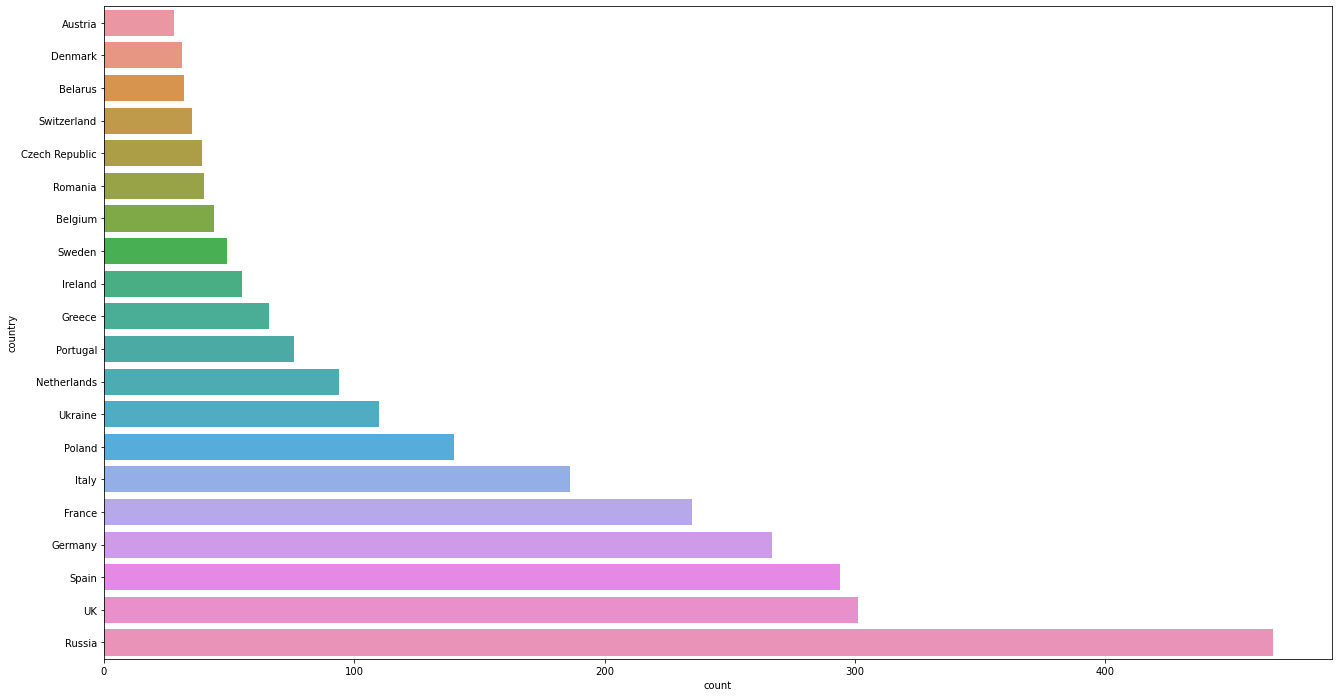

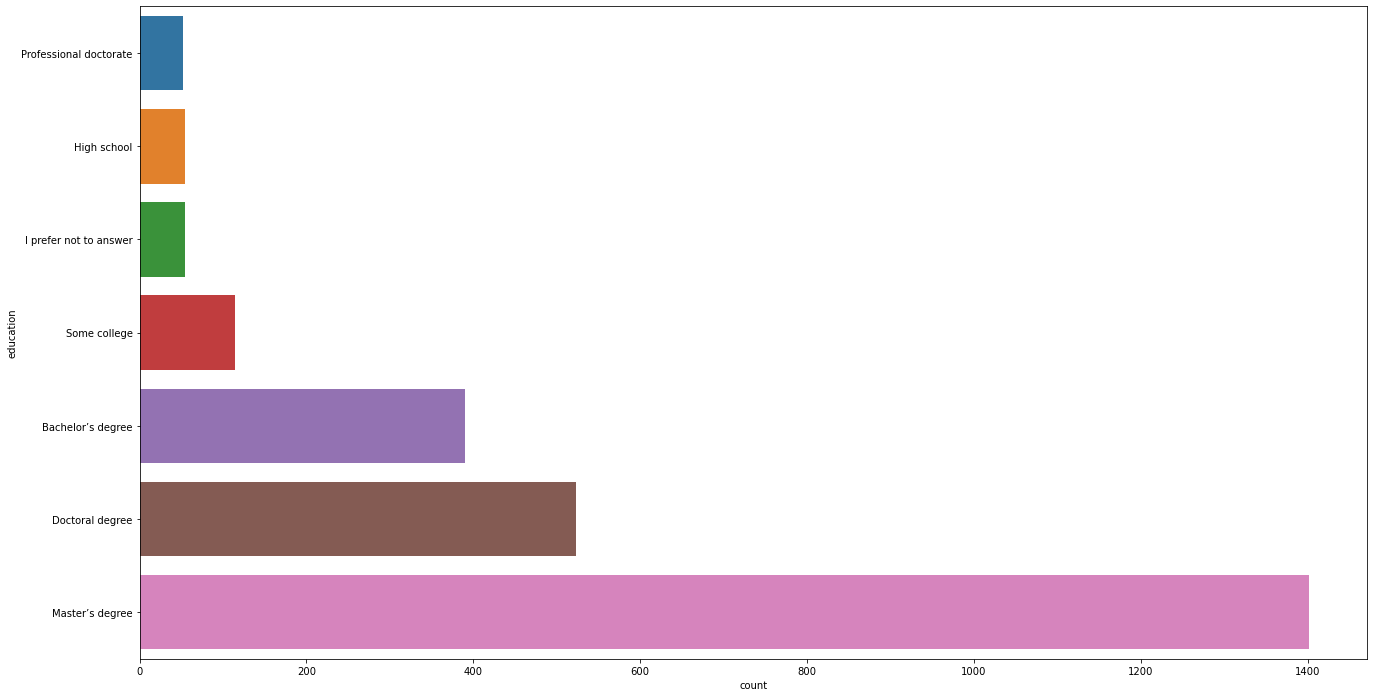

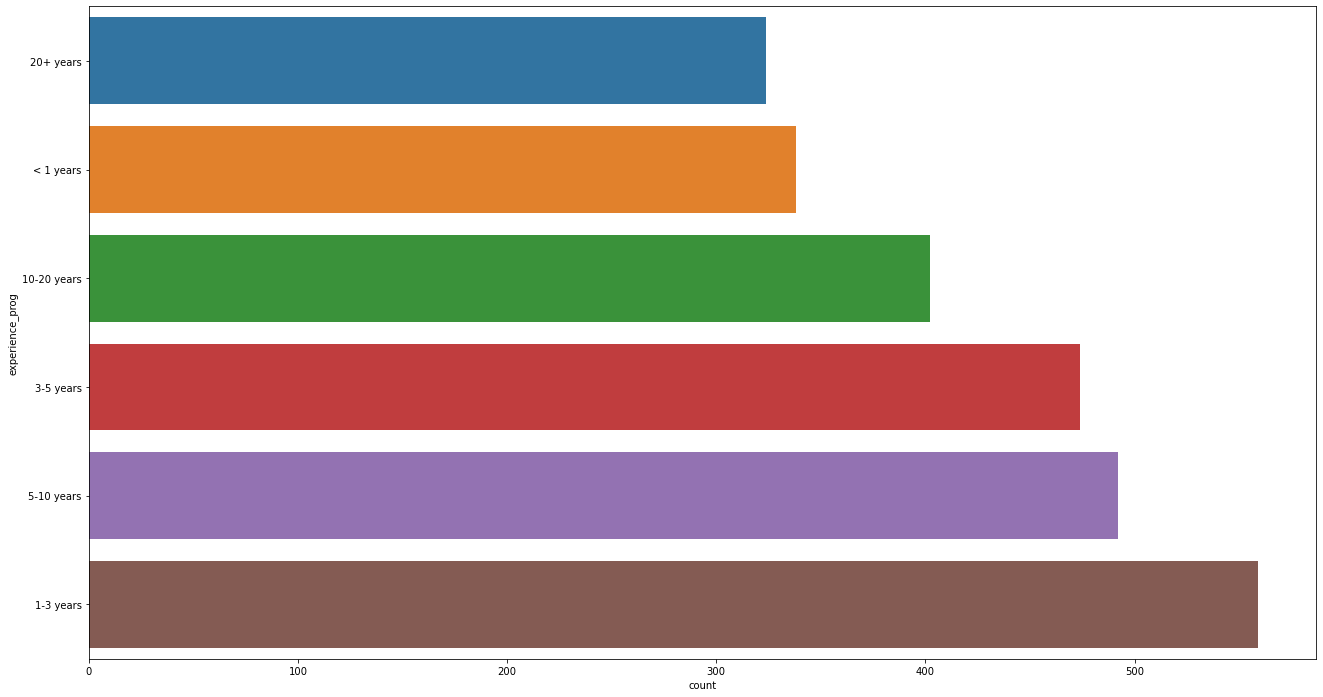

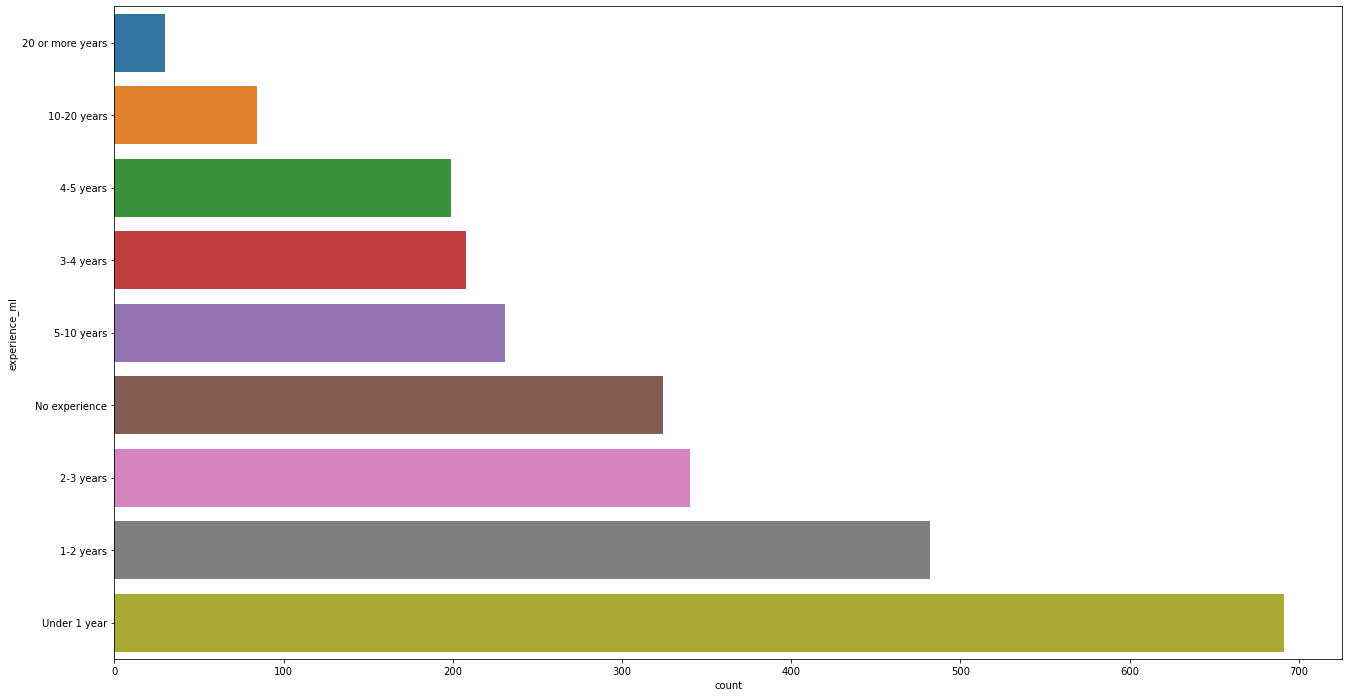

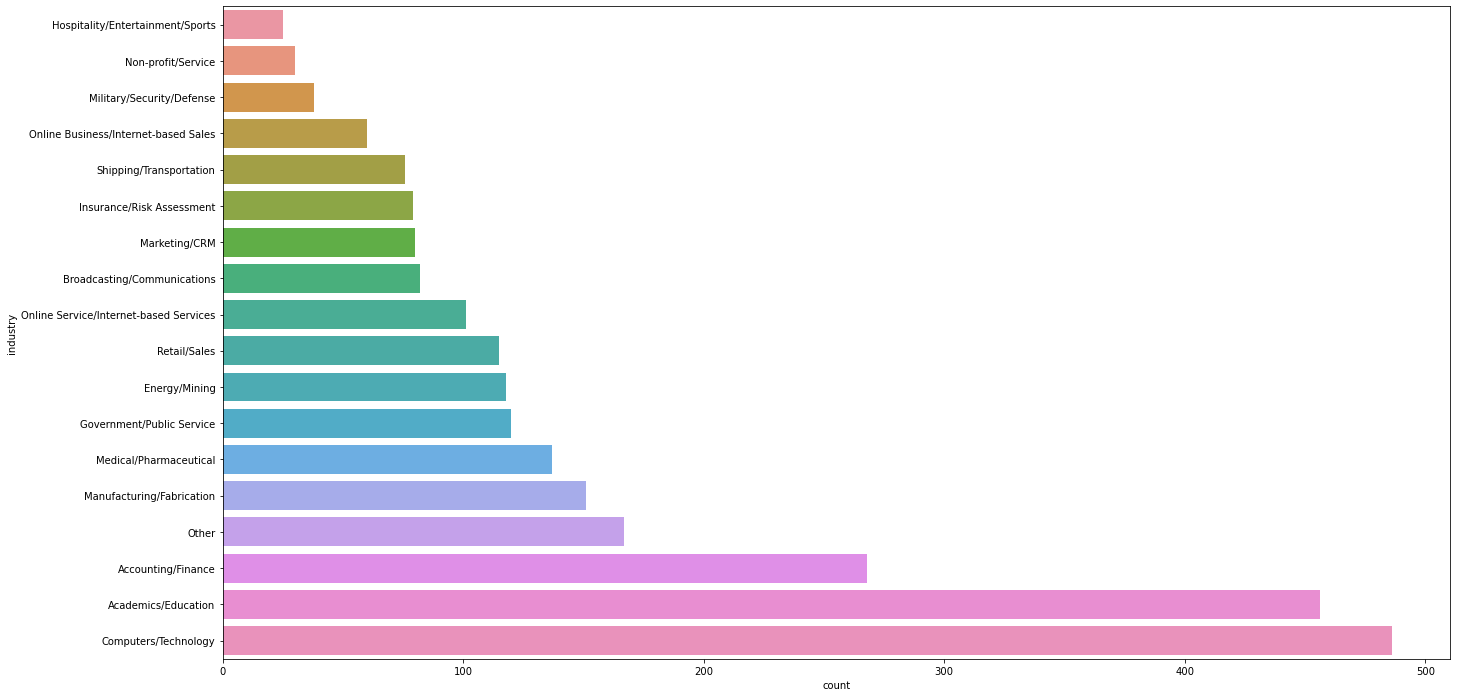

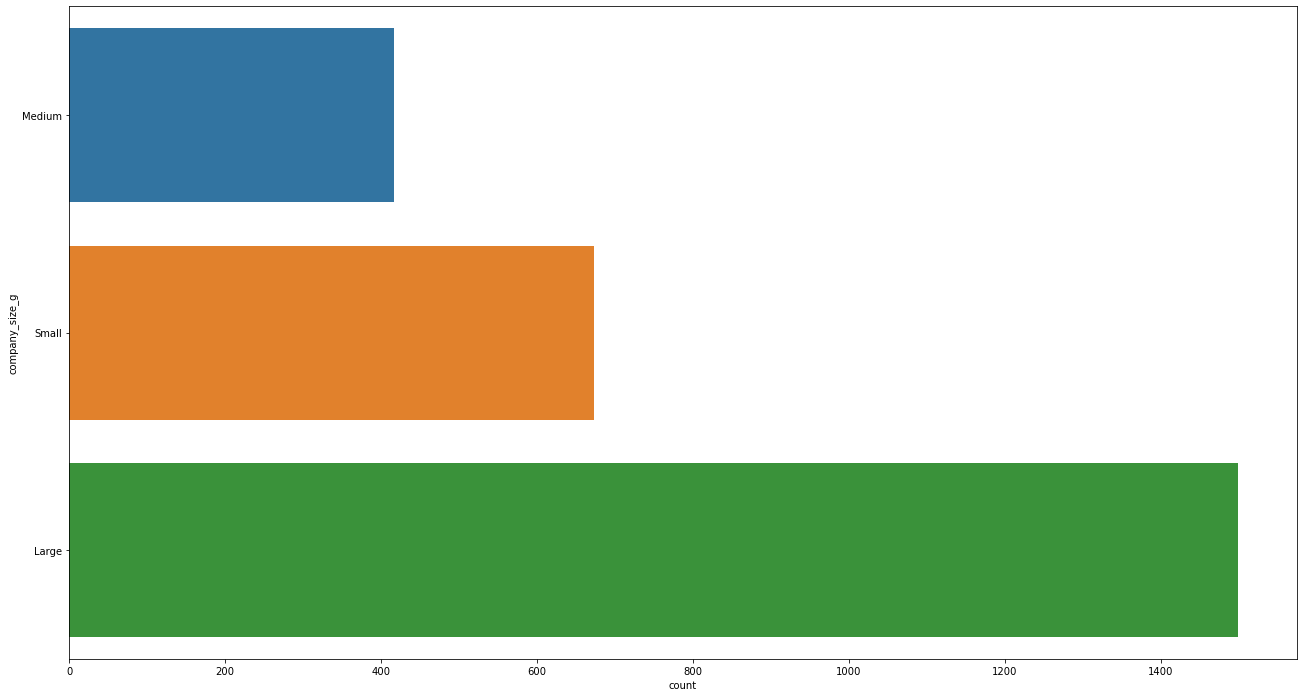

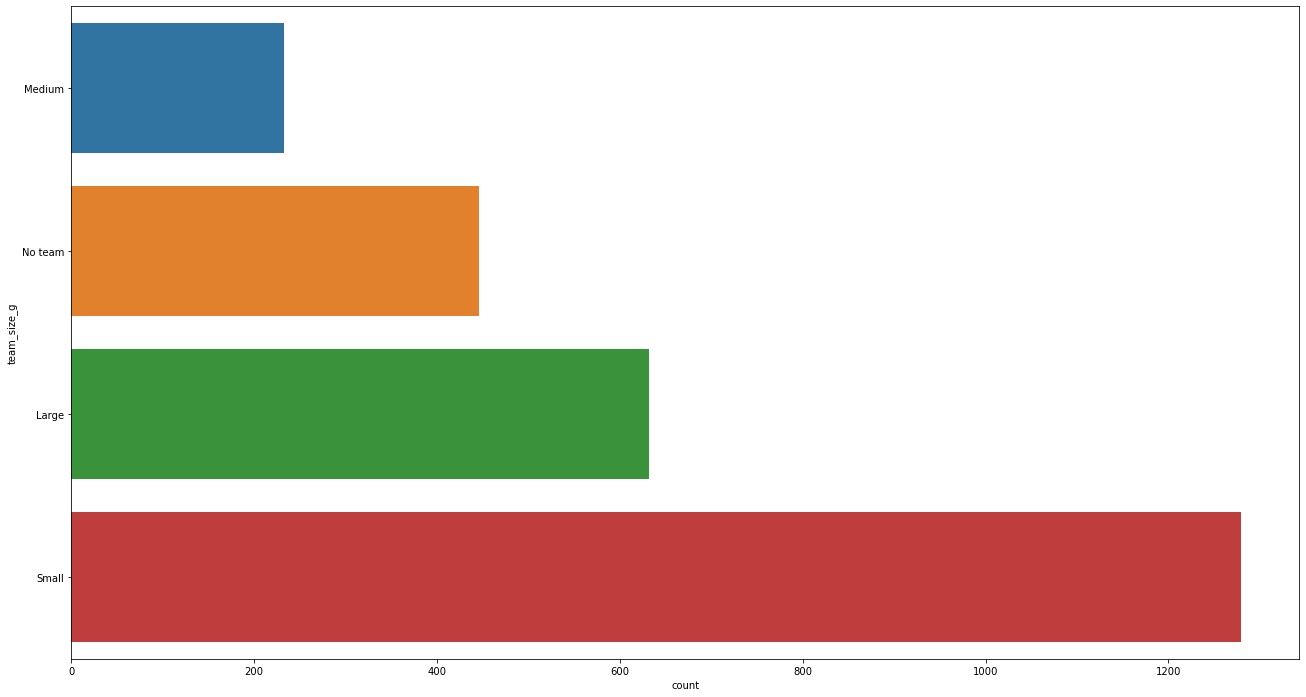

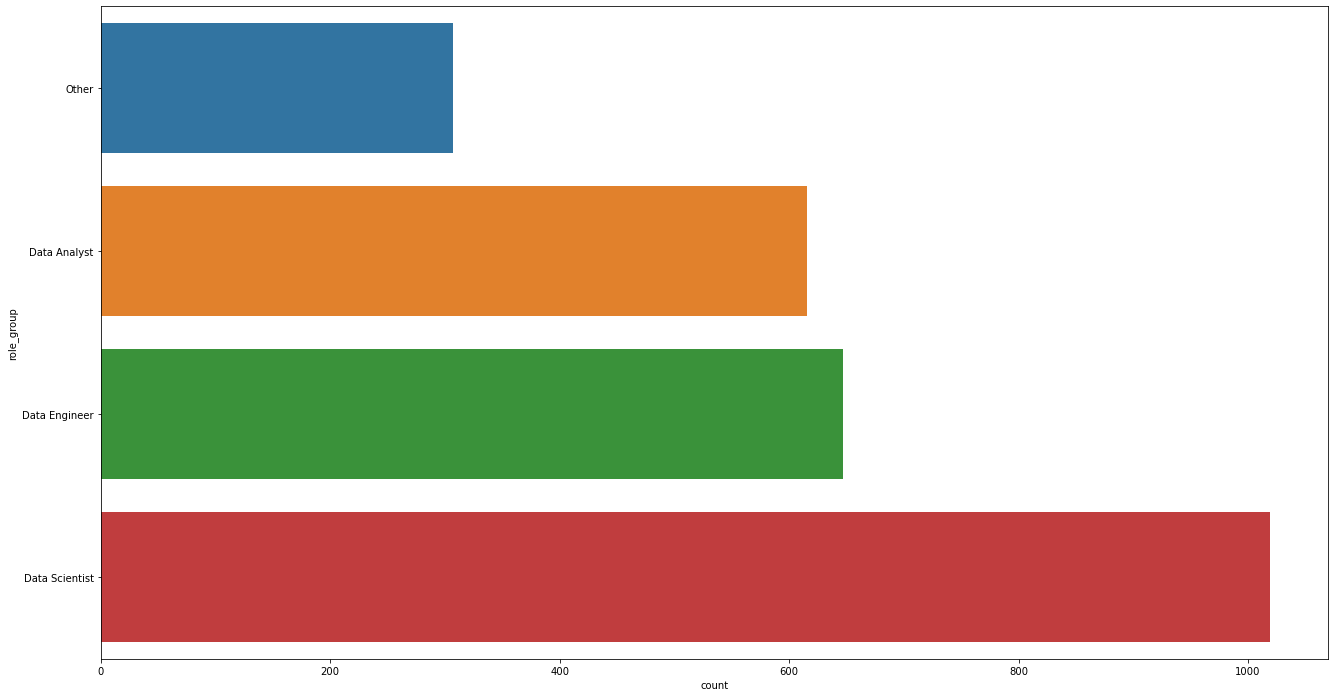

In [362]:
dist_cat(data)

The vast majority of the Kagglers are men and earn less than 10k/year

### Data correlation

#### Numerical variables

In [389]:
corr_df_model = data.select_dtypes([np.number])
correlations_matrix = corr_df_model.corr()  # method='spearman'
correlations_matrix

,programming_lang_c,salary_avg
programming_lang_c,1.000000,0.091412
salary_avg,0.091412,1.000000


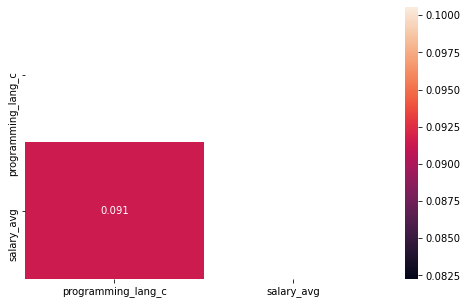

In [390]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

I have decided not to drop any of these columns as correlation is not high.

#### Categorical variables

I will apply the same correlation method (spearman) to the categorical variables and will use factorize This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values.

In [391]:
data_cat1 = data.select_dtypes(np.object)
data_num = data.select_dtypes(np.number)

In [392]:
corr_mat = data_cat1.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson')

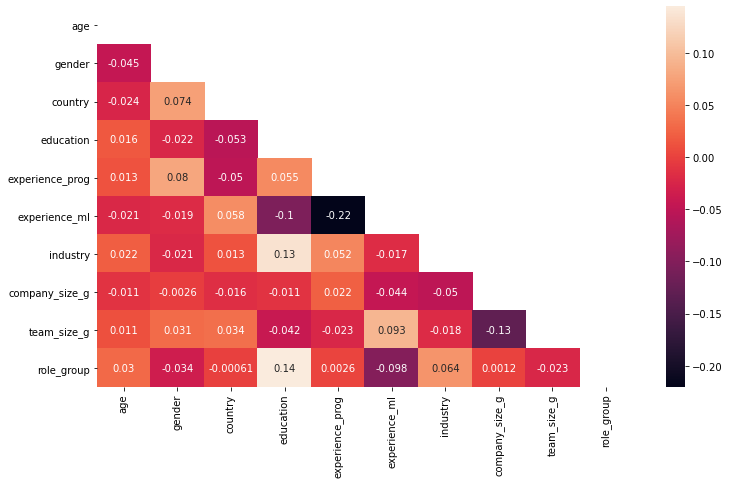

In [393]:
mask = np.zeros_like(corr_mat)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.heatmap((corr_mat), mask=mask, annot=True)
plt.show()

I have decided not to drop any of these columns are not correlated

In [395]:
data.head()

,age,gender,country,education,experience_prog,programming_lang_c,experience_ml,industry,company_size_g,team_size_g,role_group,salary_avg
10,35-39,Man,Greece,Doctoral degree,10-20 years,4,4-5 years,Academics/Education,Medium,Small,Data Scientist,12500.0
11,50-54,Man,Belgium,Bachelor’s degree,20+ years,2,1-2 years,Energy/Mining,Large,Small,Data Analyst,2500.0
16,25-29,Woman,Poland,Master’s degree,3-5 years,2,Under 1 year,Computers/Technology,Small,Small,Data Engineer,27500.0
25,25-29,Man,Italy,Master’s degree,1-3 years,2,Under 1 year,Energy/Mining,Small,Small,Other,35000.0
36,35-39,Woman,Russia,I prefer not to answer,1-3 years,2,No experience,Academics/Education,Large,Small,Data Scientist,500.0


Data to fit the model

In [396]:
data.to_csv('df_model1.csv')